# Project structure description
- `main_notebook.ipynb` (this) - illustrates the learning effects of enhancing 
the simple UCB Q-learner
- `other-stateful/` - older implementation of q-learning with states, not used 
for this main project
- `rl/` - helper functions from https://github.com/wangjksjtu/rl-perturbed-reward
- `agent_comparison.ipynb` - comparing the learning curves of different agents
- `experiments_limits.ipynb` - experiments with a large number of steps, to see 
if the q-values converget to the "true" ones, in the limit

# Intro

This notebook runs through the main classes.

Based on:
- Adapting Virtual Embodiment Through Reinforcement Learning (Prossute et al.)
- Reinforcement Learning with Perturbed Rewards (Wang et al.)

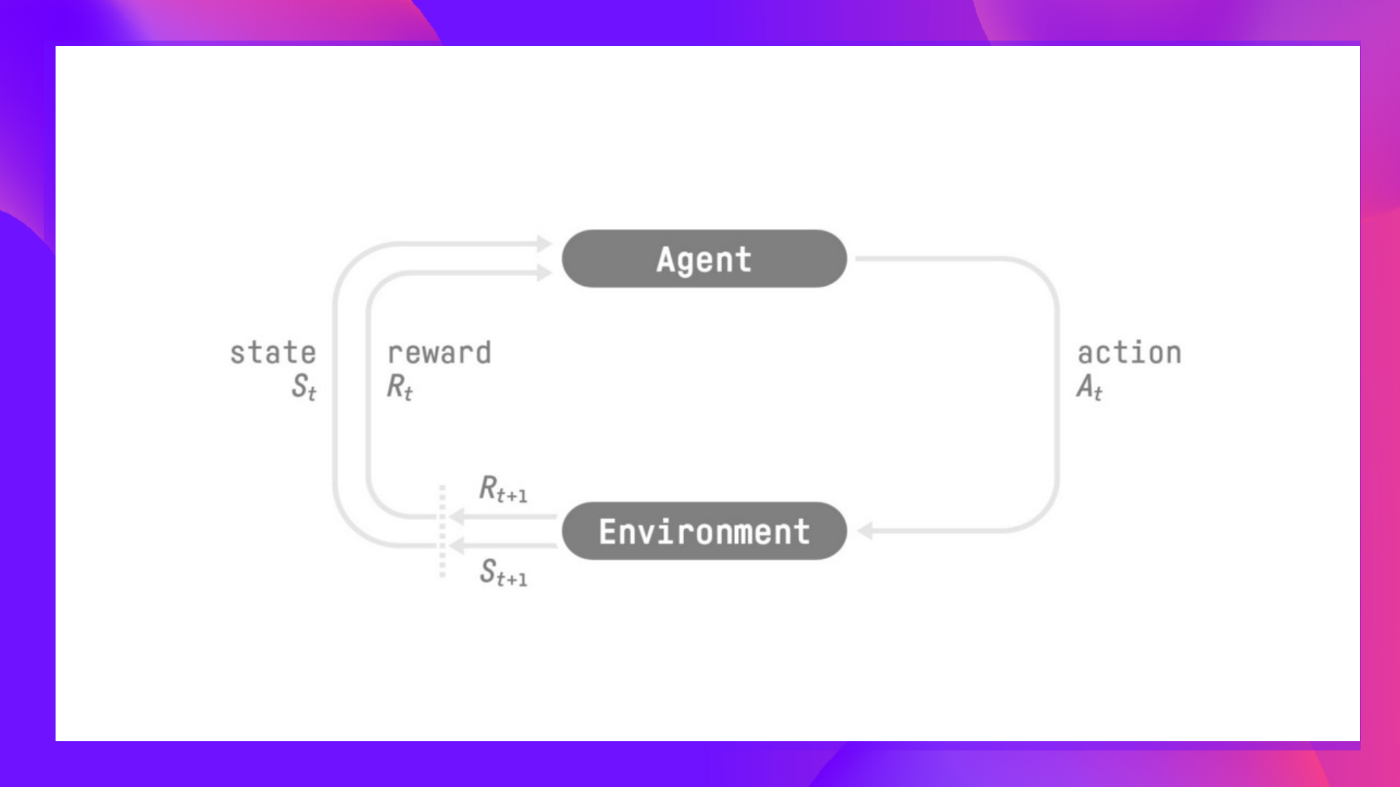

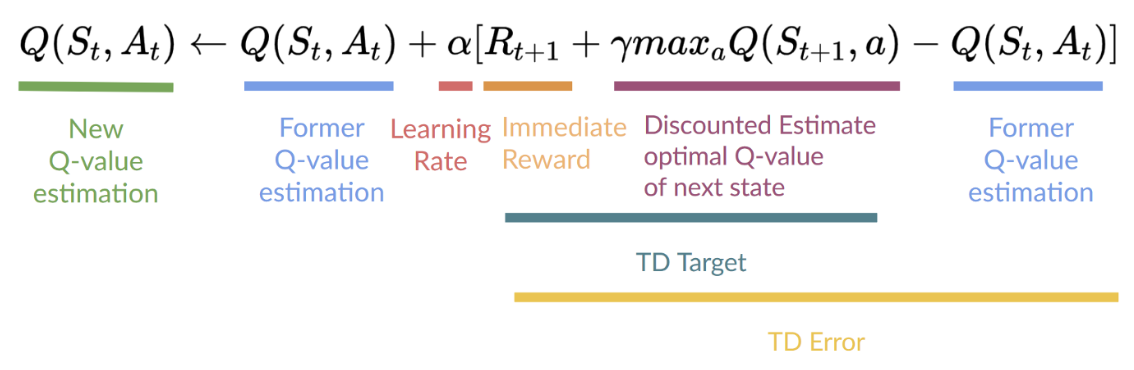

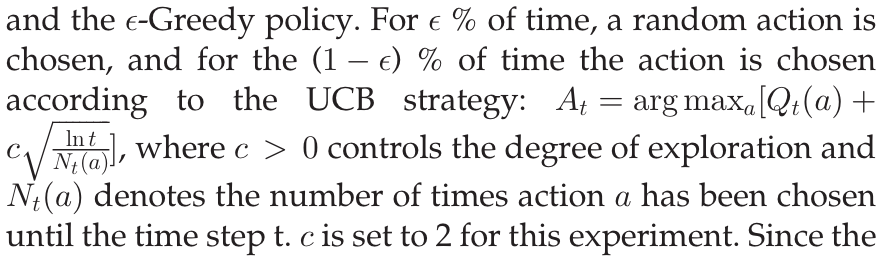

# Imports

In [20]:
import pandas as pd
import numpy as np

In [21]:
import noise_estimator

The initial agent and environment implementation had multiple states. We then decided on a stateless setting. At that point, it was easier to create a new `_stateless` wrapper class, which inherits from the multi classes, but sets `num_states=1`

In [22]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [23]:
import matplotlib.pyplot as plt

import utils
from utils import *
from modified_pendulum_processor import ModifiedPendulumProcessor

# Params

In [24]:
params_new = {
    'plots': True,
    }

params = default_params() | params_new

# Noiseless rewards UCB Q-learning

Q-table:
[[-6.3312 -5.5712 -6.1808 -7.1221 -8.2346 -7.6195 -8.3779]]
Number of times action was taken:
[[13. 81. 16.  5.  5.  4.  3.]]
Total timesteps:
120


<Axes: >

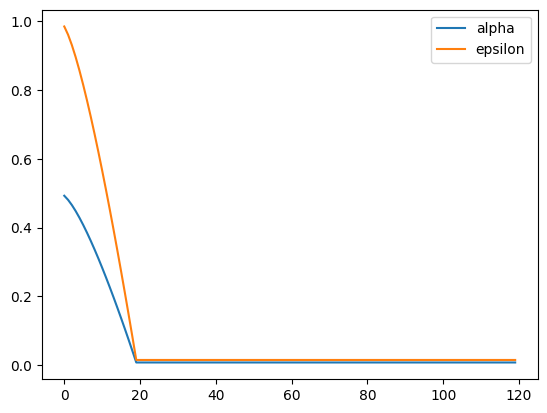

In [25]:
# Run agent for one episode
params_new = {
    'noise': False,
}
params = params | params_new

agent = UCBQAgent(params=params)

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)

df = pd.DataFrame([alphas, epsilons]).T
df.columns = ['alpha', 'epsilon']
df.plot()


100%|██████████| 100/100 [00:00<00:00, 319.26it/s]


Accuracy: 97.0
Mean episode length: 115.15


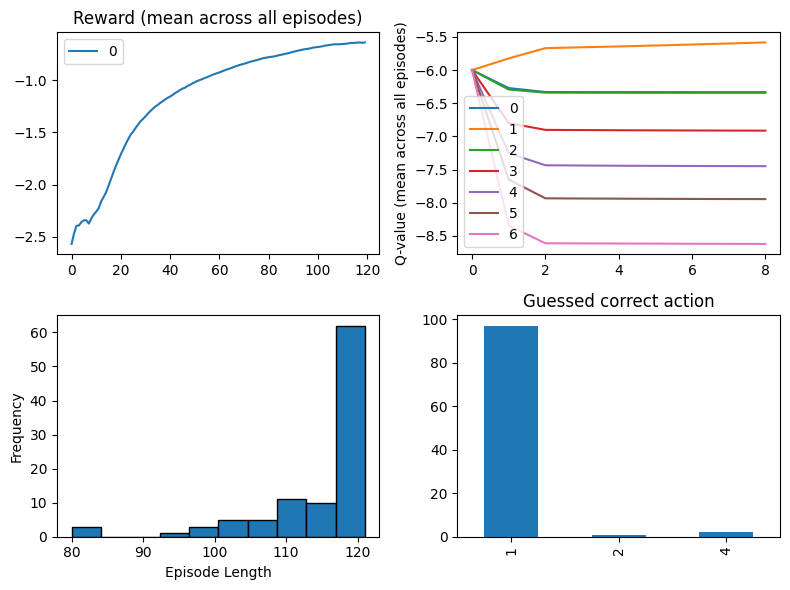

array([-6.333216, -5.582565, -6.342361, -6.91353 , -7.449145, -7.945729,
       -8.621764])

In [26]:
params_new = {
    'noise': False,
    }
params = params | params_new

plot_mean_q_values(params=params)

100%|██████████| 1/1 [00:00<00:00, 301.42it/s]


Accuracy: 100.0
Mean episode length: 101.0


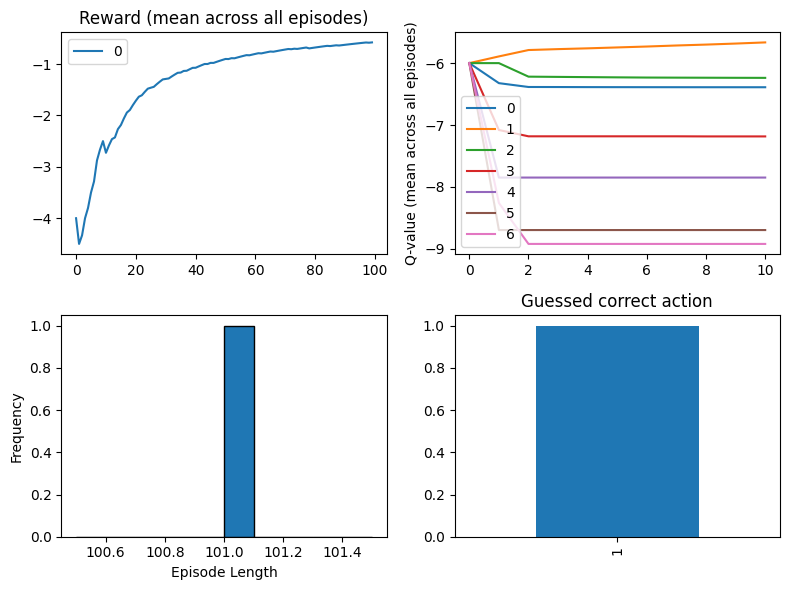

array([-6.3895, -5.6654, -6.2381, -7.1839, -7.8484, -8.6963, -8.9204])

In [27]:
params_new = {
    'noise': False,
    'max_steps': 100,
    'num_episodes': 1,
    # 'convergence_count_start': 10000,    
    }
params = default_params() | params_new

plot_mean_q_values(params=params)

# Noisy rewards
- rewards are now noisy
- q-learner hasn't changed

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

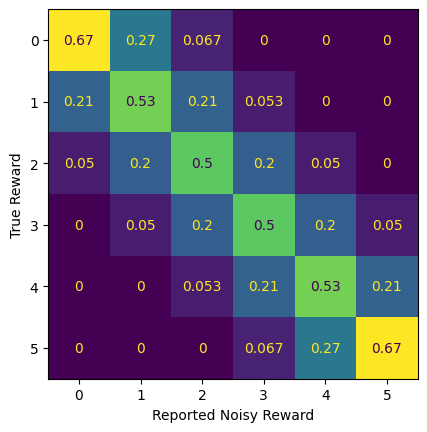

Is invertible: 


True

In [29]:
params = default_params()
num_actions = params['num_actions']
correct_action = params['correct_action']
# params['diag'] = 0.69
# Confusion matrix used as noise
env = ModifiedRandomEnvironment(params=params)
num_unique_rewards = env.get_num_unique_rewards()
cmat = ModifiedPendulumProcessor(num_unique_rewards=num_unique_rewards).initialize_cmat()
disp = ConfusionMatrixDisplay(cmat)
ax = disp.plot(colorbar=False).ax_
ax.set_ylabel('True Reward')
ax.set_xlabel('Reported Noisy Reward') 
plt.show()
print('Is invertible: ')
noise_estimator.is_invertible(cmat)

100%|██████████| 100/100 [00:00<00:00, 245.36it/s]

Accuracy: 57.99999999999999
Mean episode length: 120.67
Last reward processor:
Estimated confusion matrix:


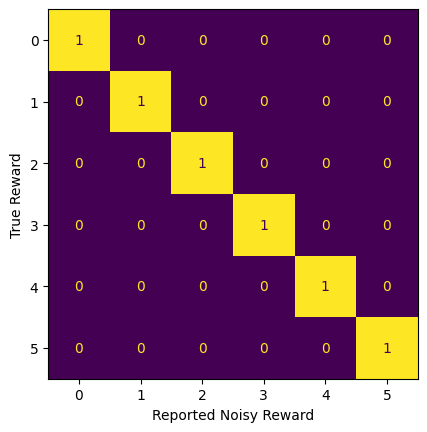

Reward sets:
(0, 0): [-1, -1, -1, 0, 0, -1, -2, -1, -2, -1, -1, 0, -1, -1, 0, 0, -2, -2, -1]
(0, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, -2, 0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, -2, 0, -1, 0, 0]
(0, 2): [-2, -1, 0, -2, -2, 0, 0, 0, -1, -1, -1, -2, -1, -1, -2]
(0, 3): [0, -4, -1, -3, -3]
(0, 4): [-5, -3, -3]
(0, 5): [-4, -5]
(0, 6): [-5, -5, -5]
Reward set counts:
Key (0, 0): 19 items
Key (0, 1): 73 items
Key (0, 2): 15 items
Key (0, 3): 5 items
Key (0, 4): 3 items
Key (0, 5): 2 items
Key (0, 6): 3 items


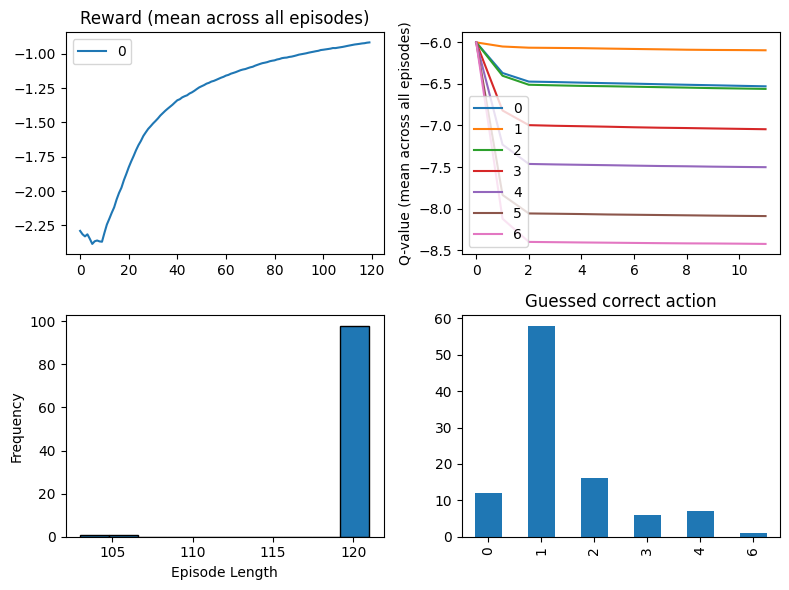

array([-6.528657, -6.094768, -6.559678, -7.045236, -7.502054, -8.090773,
       -8.426114])

In [30]:
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# params=res['params']
params_new = {
    'noise': True,
    'plots': True,
    }
params = default_params() | params_new
plot_mean_q_values(params=params)

# Surrogate rewards

100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Accuracy: 0.0
Mean episode length: 1201.0
Last reward processor:
Estimated confusion matrix:


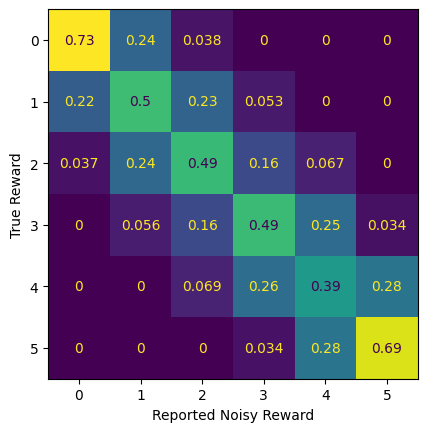

Reward sets:
(0, 0): [-1, 0, -1, 0, -1, -1, 0, -1, -3, 0, -1, -1, 0, -2, 0, -1, -1, -1, 0, -1, -3, -2, -1, -1, -1, -3, -3, -1, -1, -1, 0, -1, -1, -1, -1, -2, -1, -2, -1, -1, -3, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -2, -2, 0, -1, -1, -1, -1, 0, -1, -3, -1, -1, -1, 0, -1, 0, 0, -1, -2, -1, -1, -1, -1, -2, 0, -1, 0, 0, -1, -2, -2, 0, -2, -3, -1, -1, -1, 0, -1, -1, -2, -2, -1, 0, -2, 0, -1, -1, -1, -1, -1, 0, -1, 0, -2, -1, -1, -2, -2]
(0, 1): [0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, -2, 0, -2, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -2, -2, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -2, 0, 0, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, -2, -1, -2, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, -1, -2, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -2, -1, 0, 0, 0, -1, 0, 0, 0, 

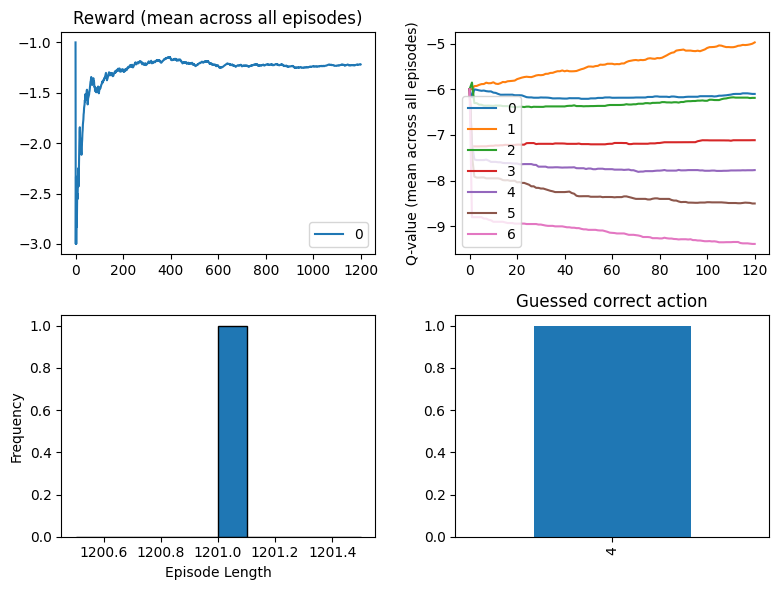

array([-6.1019, -4.9724, -6.1882, -7.1162, -7.7716, -8.5038, -9.3904])

In [31]:
# When we always pick at random, we never end up consistently picking the same action
# so the consecutive_count condition is never triggered. 
# Therefore the agent has enough observations to properly estimate the noise matrix
params_new ={
    'max_steps': 1200,
    'num_episodes': 1,
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # epsilon min must be high, otherwise we never end up with a convertable matrix
    # and never end up using the surrogate rewards
    'epsilon_min': 0.5,
    # 'diag': 0.5,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 132.22it/s]


Accuracy: 75.0
Mean episode length: 115.6
Last reward processor:
Estimated confusion matrix:


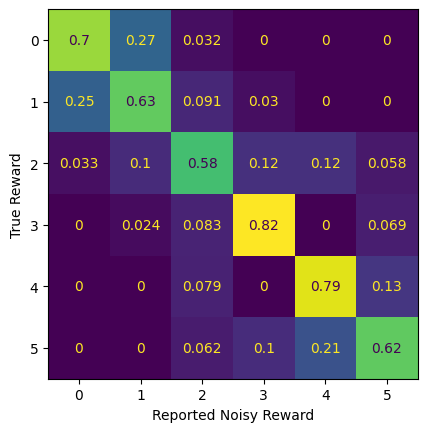

Reward sets:
(0, 0): [0, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -2, -1, -1, -2, -1, -1, -1, -1, -2, -1, -1]
(0, 1): [-1, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -2, 0, 0, -1, 0, 0, 0, -1, 0, -1, -2, 0, 0, 0, -2, 0, 0, -1, 0, -1, 0, 0, 0, -1, -1, -1]
(0, 2): [-1, -1, 0, 0, -1, 0, -1, -1, 0, -1, -2, 0, 0, -1, -2, -3, -1, -1, -2, -2, -1]
(0, 3): [0, -3, -1, -1, -2, -1, -1, -2, -3]
(0, 4): [-2, -2, -4, -2, -2, -4, -5, -3, -3, -2]
(0, 5): [-5, -3, -4]
(0, 6): [-4, -5, -5]
Reward set counts:
Key (0, 0): 22 items
Key (0, 1): 52 items
Key (0, 2): 21 items
Key (0, 3): 9 items
Key (0, 4): 10 items
Key (0, 5): 3 items
Key (0, 6): 3 items


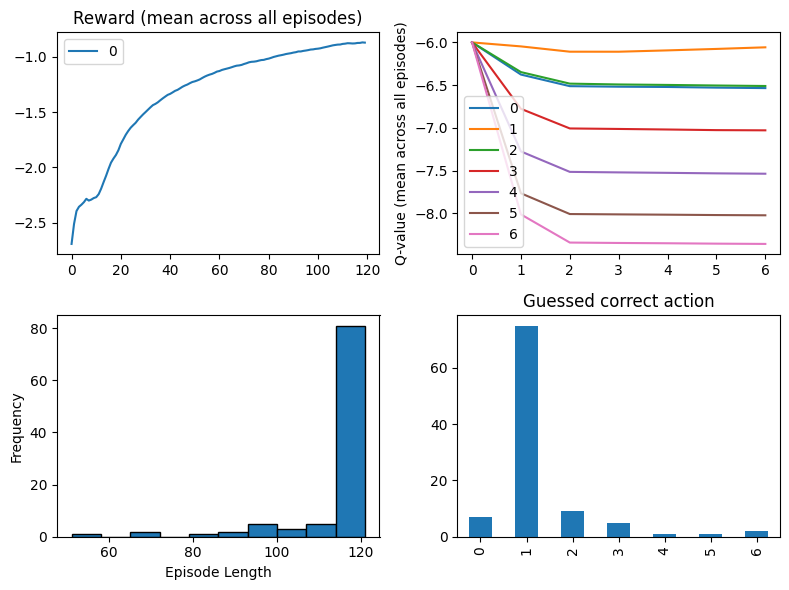

array([-6.534282, -6.057408, -6.509715, -7.028135, -7.535578, -8.021744,
       -8.356504])

In [32]:
params_new ={
    'surrogate': True,
    'plots': True,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

#TODO: Accuracy seems to be back to good, compare with disabling normalization

# Reward smoothing

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 119.04it/s]


Accuracy: 73.0
Mean episode length: 116.79
Last reward processor:
Estimated confusion matrix:


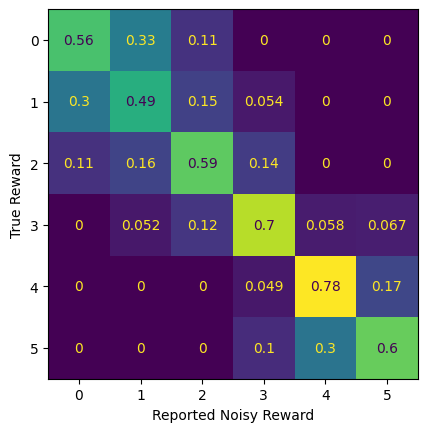

Reward sets:
(0, 0): [-1, 0, -3, -3, -1]
(0, 1): [-1, 0, 0, -1, 0, -1, 0, -1, -1, -2, -2, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, 0, 0, -1, -1, 0, -1, 0, 0, -1, -1, 0, 0, 0, -2, -1, 0, 0, 0, 0, 0, -2, 0, 0, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1, 0]
(0, 2): [0, -1, -1, 0, -1, -3, -1, -1, -2, -2, 0, -1, 0, -1, -1, 0, -1, -1, -1, -2, 0, -1, -1, -2, 0, -3, -2, -1, -1, -2, -1]
(0, 3): [0, -2, -3, -2, -2, -2, -1, -1, -2, 0, -2, -2, -2, -3]
(0, 4): [-3, -3, -2, -3, -3, -3, -3, -4]
(0, 5): [-5, -3, -5, -4, -4]
(0, 6): [-5, -4]
Reward set counts:
Key (0, 0): 5 items
Key (0, 1): 55 items
Key (0, 2): 31 items
Key (0, 3): 14 items
Key (0, 4): 8 items
Key (0, 5): 5 items
Key (0, 6): 2 items


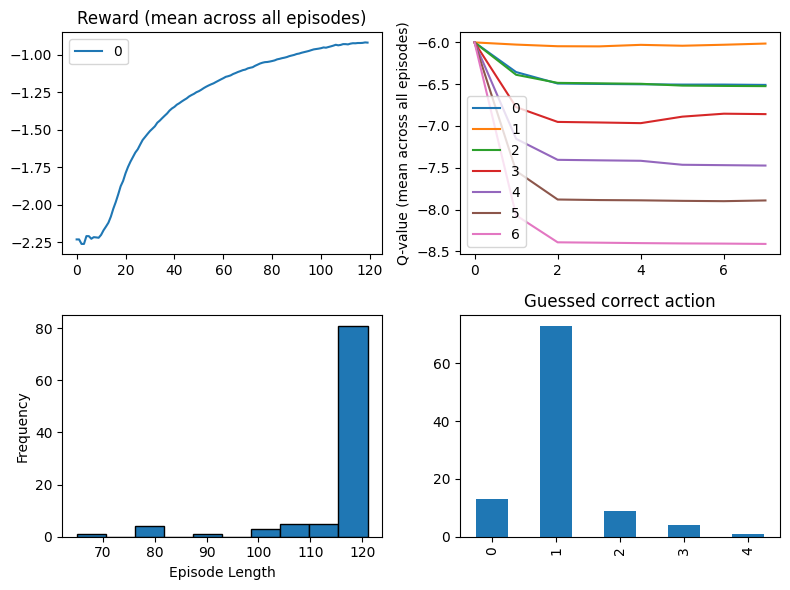

array([-6.50856 , -6.01378 , -6.523364, -6.858302, -7.474006, -7.891685,
       -8.411982])

In [33]:
params_new = {
    'noise': True,
    'plots': True,
    'surrogate': True,
    'smooth': True,
    }
params = default_params() | params_new
plot_mean_q_values(params=params)

# Sanity check

In [37]:
params = default_params()

params['noise'] = False
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print('No noise, best accuracy')
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print('Noise, no surrogate')
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print('Noise, yes surrogate, accuracy should improve')
print(accuracy, mean_episode_length) 

100%|██████████| 100/100 [00:00<00:00, 320.61it/s]


No noise, best accuracy
93.0 115.26


100%|██████████| 100/100 [00:00<00:00, 260.23it/s]


Noise, no surrogate
64.0 121.0


100%|██████████| 100/100 [00:00<00:00, 102.10it/s]

Noise, yes surrogate, accuracy should improve
81.0 114.41
